# Linear Regression

Linear regression is a type of statistical modeling that is used to analyze the relationship between a dependent variable and one or more independent variables. It involves fitting a linear equation to a set of data points in order to find the best line of fit that describes the relationship between the variables.

## Pros and Cons
### Pros:

Simplicity: Linear regression is a relatively simple and easy-to-understand statistical modeling technique that can be implemented using basic mathematical operations.

Efficiency: Linear regression can be computed quickly and efficiently, even for large datasets.


### Cons:

Limited applicability: Linear regression may not be appropriate for modeling nonlinear relationships or for datasets with complex patterns.

Outliers: Linear regression is sensitive to outliers, which can have a significant impact on the results of the analysis.

## Import libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


## Import Cleaned Dataset 

In [2]:
dataset = pd.read_csv('CleanedLifeExpectancy.csv')
dataset.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.000000,0.010000,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479,10.1
1,Albania,2015,Developing,77.8,74.0,35.129032,4.600000,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
2,Algeria,2015,Developing,75.6,19.0,21.000000,5.288333,0.000000,95.0,63,...,95.0,7.08,95.0,0.1,4132.762920,3.987153e+07,6.0,5.8,0.743,14.4
3,Angola,2015,Developing,52.4,335.0,66.000000,5.288333,0.000000,64.0,118,...,7.0,7.08,64.0,1.9,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,2015,Developing,76.4,13.0,35.129032,5.288333,0.000000,99.0,0,...,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9


## Pick variable to use

In [3]:
lindata = dataset.copy()
lindata.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
year,1.000000,0.155619,-0.077258,-0.037966,-0.047699,0.018139,0.232699,-0.077626,-0.046288,0.080662,0.127349,0.115851,-0.150311,0.096902,0.014596,-0.042736,-0.048089,0.151915,0.175761
life_expectancy,0.155619,1.000000,-0.716656,-0.128234,0.398467,0.382769,0.298232,-0.142794,-0.157036,0.463076,0.209544,0.478326,-0.564042,0.437210,-0.020239,-0.478614,-0.474726,0.849697,0.739789
adult_mortality,-0.077258,-0.716656,1.000000,0.045717,-0.186481,-0.239640,-0.195632,0.063333,0.066052,-0.285495,-0.109795,-0.295527,0.556155,-0.279379,-0.010339,0.313195,0.317230,-0.555992,-0.446600
infant_deaths,-0.037966,-0.128234,0.045717,1.000000,-0.079040,-0.046831,-0.200641,0.479428,0.995960,-0.129115,-0.108360,-0.138408,-0.011707,-0.063058,0.542093,0.435636,0.441747,-0.133029,-0.150398
alcohol,-0.047699,0.398467,-0.186481,-0.079040,1.000000,0.336271,0.082609,-0.086099,-0.084771,0.220562,0.304815,0.219481,-0.055343,0.316767,-0.037810,-0.426447,-0.414776,0.504906,0.530893
percentage_expenditure,0.018139,0.382769,-0.239640,-0.046831,0.336271,1.000000,-0.007715,-0.060563,-0.049952,0.147834,0.161936,0.143120,-0.099474,0.887268,-0.025952,-0.255348,-0.257352,0.448778,0.407339
hepatitis_b,0.232699,0.298232,-0.195632,-0.200641,0.082609,-0.007715,1.000000,-0.145593,-0.214082,0.466473,0.097284,0.570761,-0.125363,0.054701,-0.080120,-0.169614,-0.183038,0.265698,0.268012
measles,-0.077626,-0.142794,0.063333,0.479428,-0.086099,-0.060563,-0.145593,1.000000,0.473361,-0.118173,-0.104495,-0.123612,0.021487,-0.071498,0.250682,0.224782,0.221445,-0.131423,-0.137378
under-five_deaths,-0.046288,-0.157036,0.066052,0.995960,-0.084771,-0.049952,-0.214082,0.473361,1.000000,-0.149362,-0.111081,-0.161412,0.002706,-0.068393,0.532344,0.440296,0.445357,-0.157080,-0.170743
polio,0.080662,0.463076,-0.285495,-0.129115,0.220562,0.147834,0.466473,-0.118173,-0.149362,1.000000,0.127053,0.670108,-0.159266,0.202804,-0.033724,-0.219994,-0.222929,0.444036,0.423253


Upon examining the heatmap, it is evident that a substantial relationship, or correlation, exists between the variables 'GDP' and 'life_expectancy' within the Life Expectancy dataset.

It is advisable to construct a linear model between the variables 'GDP' and 'life_expectancy' to better understand their relationship. This will allow us to examine how life expectancy correspond to changes in the "GDP." Consequently, we shall proceed to create and fit the linear model.

In [25]:
linear_reg = LinearRegression()
x = lindata.gdp.values.reshape(-1,1)
y = lindata['life_expectancy'].values.reshape(-1,1)          

linear_reg.fit(x,y)

LinearRegression()

**y = b0 + b1*x** is our linear regression model.
Let's see estimated percentage of expenditure in GDP 10 thousand:

In [26]:
b0 = linear_reg.predict(([[10000]]))       
print("b0: ", b0)

b1 = linear_reg.coef_
print("b1: ", b1)

b0:  [[70.17289745]]
b1:  [[0.00030917]]


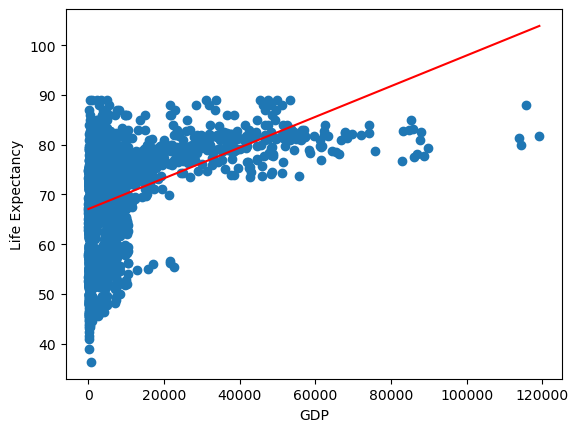

Mean Absolute Error:  59501.71394194744
Mean Squared Error:  4723215060.910148
Root Mean Squared Error:  68725.65067651341


In [29]:
x_array = np.arange(min(dataset.gdp),max(dataset.gdp)).reshape(-1,1)  

plt.scatter(x,y)
y_head = linear_reg.predict(x_array)                                
plt.plot(x_array,y_head,color="red")

plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))

In [21]:
print(r2_score(y,linear_reg.predict(x)))

0.27261668461926003


The conclusion drawn from this analysis is that the generated estimate exhibits a 27.26% accuracy level.

Thus there is definitely a better model than Linear regression to use.